In [5]:
# 1
import numpy as np
import pandas as pd

In [6]:
# 2
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
import random

np.random.seed(1234)
random.seed(1234)

In [34]:
train_df.shape

(891, 12)

In [33]:
test_df.shape

(418, 11)

In [37]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [41]:
train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [42]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [58]:
train_df["Embarked"][train_df["Embarked"] == "S"][train_df["Survived"] == 1].count()

217

In [59]:
train_df["Embarked"][train_df["Embarked"] == "S"][train_df["Survived"] == 0].count()

427

In [62]:
train_df["Cabin"].value_counts().head(50)

C23 C25 C27        4
B96 B98            4
G6                 4
E101               3
F2                 3
C22 C26            3
D                  3
F33                3
C123               2
E121               2
B20                2
B57 B59 B63 B66    2
B18                2
B58 B60            2
B35                2
E33                2
C68                2
D20                2
D36                2
B77                2
B5                 2
C52                2
C2                 2
E67                2
D26                2
F G73              2
E25                2
E8                 2
D17                2
B28                2
D35                2
F4                 2
B49                2
C93                2
C125               2
C65                2
C83                2
C92                2
B22                2
E44                2
C78                2
D33                2
C126               2
B51 B53 B55        2
E24                2
C124               2
A14                1
E38          

In [63]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [66]:
plt.style.use("ggplot")

In [74]:
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [73]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [75]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(
    ["Embarked", "Survived"]
).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [77]:
embarked_df = (
    train_df[["Embarked", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["Embarked", "Survived"])
    .count()
    .unstack()
)

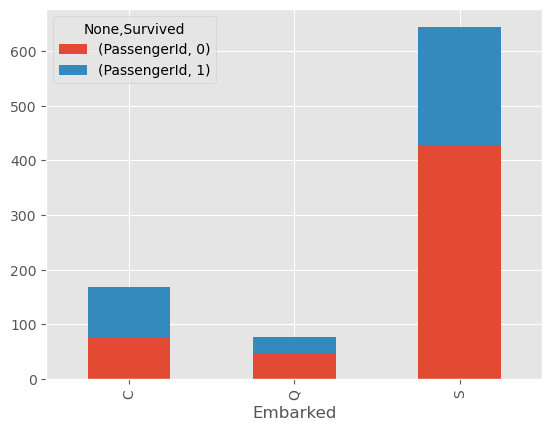

In [78]:
embarked_df.plot.bar(stacked=True)

In [82]:
embarked_df["survived_rate"] = embarked_df.iloc[:, 1] / (
    embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1]
)

In [83]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

In [85]:
sex_df = (
    train_df[["Sex", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["Sex", "Survived"])
    .count()
    .unstack()
)

In [86]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

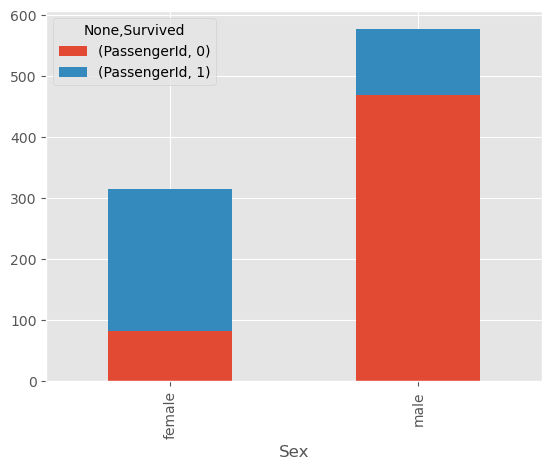

In [87]:
sex_df.plot.bar(stacked=True)

In [89]:
sex_df["Survived_rate"] = sex_df.iloc[:, 1] / (sex_df.iloc[:, 0] + sex_df.iloc[:, 1])

In [90]:
sex_df

PassengerId      Survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

In [94]:
ticket_df = (
    train_df[["Pclass", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["Pclass", "Survived"])
    .count()
    .unstack()
)

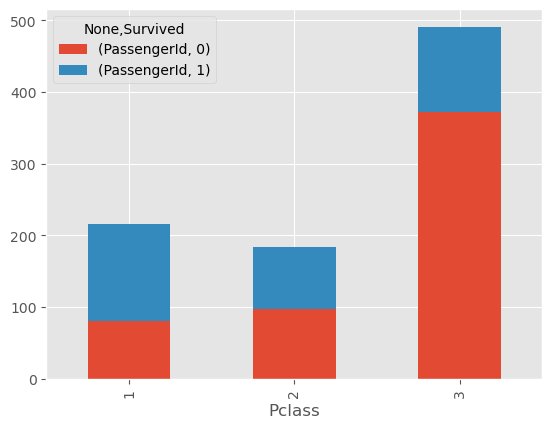

In [96]:
ticket_df.plot.bar(stacked=True)

In [97]:
ticket_df["Survived_rate"] = ticket_df.iloc[:, 1] / (
    ticket_df.iloc[:, 0] + ticket_df.iloc[:, 1]
)

In [98]:
ticket_df

PassengerId      Survived_rate
Survived           0    1              
Pclass                                 
1                 80  136      0.629630
2                 97   87      0.472826
3                372  119      0.242363

c:\ProgramData\Anaconda3\envs\kaggle_book\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


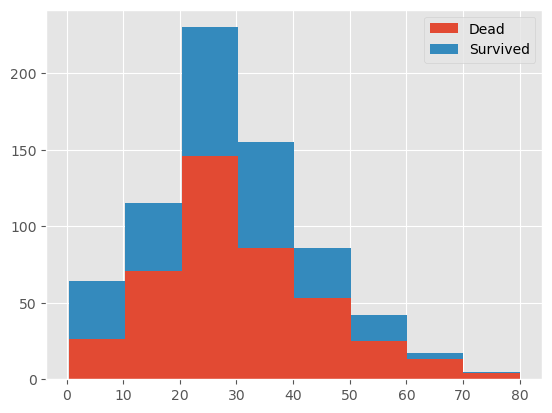

In [99]:
plt.hist(
    x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived == 1]],
    bins=8,
    histtype="barstacked",
    label=["Dead", "Survived"],
)
plt.legend()